In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/laplace_operator_metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import check_convergence, style_plot

%load_ext autoreload
%autoreload 2

In [3]:
nums_Vs = (10**np.linspace(3, 6, 16)).astype(int)[:11]
print(f"num_Vs = {nums_Vs}")

num_Vs = [  1000   1584   2511   3981   6309  10000  15848  25118  39810  63095
 100000]


In [11]:
full_tensors = {}

for num_Vs in nums_Vs:

    print(f"num_Vs = {num_Vs}")

    full_tensors[num_Vs] = {}

    if num_Vs < 10001:
        max_seeds = 32
    elif num_Vs < 39810: 
        max_seeds = 16
    else:
        max_seeds = 8

    for seed in range(max_seeds):

        if seed < max_seeds:

            np.random.seed(seed)
            rd = construct_graph.patch_graph.RGG(num_Vs)
            g = construct_graph.patch_graph.Patch(rd)
            print(f"\nSEED = {seed} / {max_seeds}")
            eq = construct_graph.patch_graph.Cell_Problem(g)
            xi = eq.solve_corrector_equation()
            _, Q, T = eq.construct_homogenized_tensor(xi)

            full_tensors[num_Vs][seed] = (Q, T)

    print("\n")


num_Vs = 1000

SEED = 0 / 32

SEED = 1 / 32

SEED = 2 / 32

SEED = 3 / 32

SEED = 4 / 32

SEED = 5 / 32

SEED = 6 / 32

SEED = 7 / 32

SEED = 8 / 32

SEED = 9 / 32

SEED = 10 / 32

SEED = 11 / 32

SEED = 12 / 32

SEED = 13 / 32

SEED = 14 / 32

SEED = 15 / 32

SEED = 16 / 32

SEED = 17 / 32

SEED = 18 / 32

SEED = 19 / 32

SEED = 20 / 32

SEED = 21 / 32

SEED = 22 / 32

SEED = 23 / 32

SEED = 24 / 32

SEED = 25 / 32

SEED = 26 / 32

SEED = 27 / 32

SEED = 28 / 32

SEED = 29 / 32

SEED = 30 / 32

SEED = 31 / 32


num_Vs = 1584

SEED = 0 / 32

SEED = 1 / 32

SEED = 2 / 32

SEED = 3 / 32

SEED = 4 / 32

SEED = 5 / 32

SEED = 6 / 32

SEED = 7 / 32

SEED = 8 / 32

SEED = 9 / 32

SEED = 10 / 32

SEED = 11 / 32

SEED = 12 / 32

SEED = 13 / 32

SEED = 14 / 32

SEED = 15 / 32
Residual too large = 1.0073405769088215e-10

SEED = 16 / 32

SEED = 17 / 32

SEED = 18 / 32

SEED = 19 / 32

SEED = 20 / 32

SEED = 21 / 32

SEED = 22 / 32

SEED = 23 / 32

SEED = 24 / 32

SEED = 25 / 32

SEED = 26 / 32

S

In [13]:
rel_errs = {}

for num_Vs in full_tensors:

    rel_errs[num_Vs] = []

    for seed in full_tensors[num_Vs]:

        R = full_tensors[num_Vs][seed][0] 
        rel_err = np.linalg.norm(R - np.trace(R) / 2 * np.eye(2)) / np.linalg.norm(np.trace(R) / 2 * np.eye(2))
        rel_errs[num_Vs].append(rel_err)

In [14]:
x = np.array(list(rel_errs.keys()))
y = np.array([np.mean(i) for i in rel_errs.values()])
dy = np.array([np.std(i) for i in rel_errs.values()])

y_ratio_upper = y * (1 + dy / y)  # Equivalent to y + dy
y_ratio_lower = y / (1 + dy / y)  # Avoids y - dy < 0
y_err_upper = (y_ratio_upper - y)
y_err_lower = (y - y_ratio_lower)

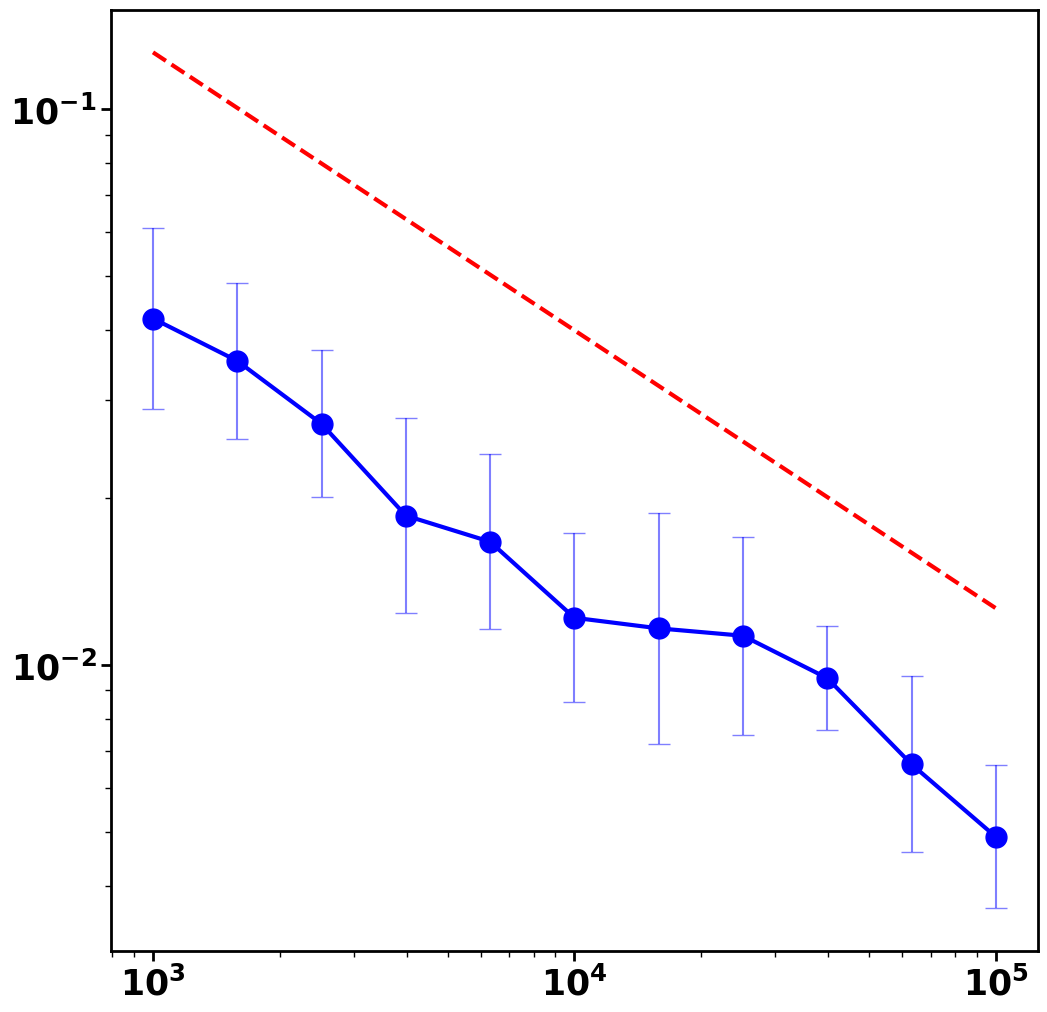

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

eigenvalue_linewidth = 3
eigenvalue_markersize = 15

ax.errorbar(x, y, yerr=[y_err_lower, y_err_upper], capsize=8, c='b', alpha=0.5, zorder=0)
ax.loglog(x, y, 'o-', c='b', linewidth=eigenvalue_linewidth, markersize=eigenvalue_markersize)

ax.loglog(x, x**(-0.5) * 4, '--', c='r', linewidth=eigenvalue_linewidth)

style_plot(fig, ax, aspect=None)

plt.show()